Point cloud loaded successfully.
Shape of the point cloud: (3, 481, 607)
Original shape of point cloud: (3, 481, 607)
Reshaped point cloud to: (3, 291967)
x_min: -0.4014720389008415, x_max: 0.3956448222312365, y_min: -0.31636215090283726, y_max: 0.31159209631825086, z_min: 0.8653499996900558, z_max: 1.21809998960495
Voxel grid dimensions: 8 x 7 x 4
Shape of the voxel grid: (8, 7, 4)


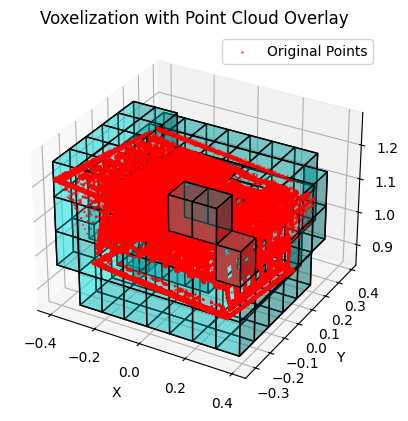

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def point_cloud_to_voxels(point_cloud, voxel_size):
    """
    Converts a point cloud to a voxel grid.
    
    Args:
        point_cloud (np.ndarray): The point cloud with shape (3, N) or (3, H, W).
        voxel_size (float): The size of each voxel.

    Returns:
        np.ndarray: A 3D numpy array representing the voxel grid.
        tuple: The minimum coordinates (x_min, y_min, z_min) for mapping back.
    """
    # Reshape the point cloud to (3, N) if it's not already
    print(f"Original shape of point cloud: {point_cloud.shape}")
    if point_cloud.ndim == 3:
        reshaped_pc = point_cloud.reshape(3, -1)
    else:
        reshaped_pc = point_cloud
    print(f"Reshaped point cloud to: {reshaped_pc.shape}")

    x, y, z = reshaped_pc
    
    x_min, y_min, z_min = np.min(reshaped_pc, axis=1)
    x_max, y_max, z_max = np.max(reshaped_pc, axis=1)

    # Calculate the dimensions of the voxel grid
    grid_x = int(np.ceil((x_max - x_min) / voxel_size))
    grid_y = int(np.ceil((y_max - y_min) / voxel_size))
    grid_z = int(np.ceil((z_max - z_min) / voxel_size))
    print(f"x_min: {x_min}, x_max: {x_max}, y_min: {y_min}, y_max: {y_max}, z_min: {z_min}, z_max: {z_max}")
    print(f"Voxel grid dimensions: {grid_x} x {grid_y} x {grid_z}")

    # Initialize the voxel grid
    voxels = np.zeros((grid_x, grid_y, grid_z), dtype=bool)

    # Map each point to its corresponding voxel
    x_indices = np.floor((x - x_min) / voxel_size).astype(int)
    y_indices = np.floor((y - y_min) / voxel_size).astype(int)
    z_indices = np.floor((z - z_min) / voxel_size).astype(int)
    
    # Filter out any indices that might be out of bounds due to floating point precision
    valid_indices = (x_indices >= 0) & (x_indices < grid_x) & \
                    (y_indices >= 0) & (y_indices < grid_y) & \
                    (z_indices >= 0) & (z_indices < grid_z)
    
    voxels[x_indices[valid_indices], y_indices[valid_indices], z_indices[valid_indices]] = True
    
    return voxels, (x_min, y_min, z_min)

def visualize_voxels_with_points(voxels, point_cloud, voxel_size, min_coords):
    """
    Visualizes a 3D voxel grid and the original points that it represents.

    Args:
        voxels (np.ndarray): The 3D numpy array representing the voxel grid.
        point_cloud (np.ndarray): The original point cloud.
        voxel_size (float): The size of each voxel.
        min_coords (tuple): The minimum coordinates of the point cloud (x_min, y_min, z_min).
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the coordinates for the voxel grid for plotting
    x_min, y_min, z_min = min_coords
    x, y, z = np.indices(np.array(voxels.shape) + 1).astype(float)
    x = x * voxel_size + x_min
    y = y * voxel_size + y_min
    z = z * voxel_size + z_min

    # Plot the voxels with a semi-transparent facecolor
    ax.voxels(x, y, z, voxels, facecolors='cyan', edgecolor='k', alpha=0.3)
    
    # Reshape point cloud for plotting
    if point_cloud.ndim == 3:
        x_pts, y_pts, z_pts = point_cloud.reshape(3, -1)
    else:
        x_pts, y_pts, z_pts = point_cloud
        
    ax.scatter(x_pts, y_pts, z_pts, c='red', marker='.', s=1, label='Original Points')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Voxelization with Point Cloud Overlay")
    ax.legend()
    plt.show()

if __name__ == "__main__":
    try:
        file_path = '/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/pc.npy'
        point_cloud = np.load(file_path)
        print("Point cloud loaded successfully.")
        print(f"Shape of the point cloud: {point_cloud.shape}")
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        print("Please make sure the path is correct and the file exists.")
        exit()

    # Get voxels from the point cloud
    # You may need to adjust the voxel_size depending on the scale of your data.
    voxel_size = 0.1
    voxels, min_coords = point_cloud_to_voxels(point_cloud, voxel_size)
    print(f"Shape of the voxel grid: {voxels.shape}")

    # Visualize the voxels with the original point cloud overlay
    visualize_voxels_with_points(voxels, point_cloud, voxel_size, min_coords)